In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from warnings import filterwarnings;
filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [51]:
df=pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')

In [52]:
df.head(10)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
5,5,1009,1033,899231,899307,409,22,26,47513,86,118,1650,1,0,70,0.2761,0.4136,0.4091,0.0053,0.5454,1.0000,1.0,2.6117,0.9542,1.4150,0.5909,-0.1890,0.8749,0,0,0,0,0,0,1
6,6,596,607,739072,7390760,204,21,21,22478,89,127,1373,0,1,40,0.8331,0.2744,0.6842,0.0110,0.7143,1.0000,1.0,2.3096,1.1761,1.3222,0.3158,-0.1497,0.5212,0,0,0,0,0,1,0
7,7,1673,1687,294065,294091,571,38,57,53142,77,110,1692,0,1,300,0.1491,0.4326,0.9643,0.0142,0.5686,0.7179,1.0,2.7528,1.3802,1.7559,0.0357,-0.2661,0.9408,1,0,0,0,0,0,0
8,8,507,521,203252,203261,101,25,12,12530,124,140,1360,0,1,40,0.7210,0.4815,0.3333,0.0176,0.8000,0.7500,0.0,2.0043,1.3802,0.7782,-0.6667,0.0305,0.3601,0,0,0,0,0,0,0
9,9,893,907,1341292,1341296,54,6,15,7052,87,133,1687,1,0,60,0.8088,0.2000,0.5333,0.0037,0.8333,1.0000,1.0,1.7324,0.6990,1.1761,0.4667,-0.1228,0.1400,0,0,0,0,0,1,0


In [53]:
df.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [54]:
df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [55]:
test.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [56]:
df.nunique()

id                       19219
X_Minimum                 1191
X_Maximum                 1259
Y_Minimum                 3345
Y_Maximum                 3341
Pixels_Areas              1154
X_Perimeter                460
Y_Perimeter                331
Sum_of_Luminosity         2595
Minimum_of_Luminosity      162
Maximum_of_Luminosity       98
Length_of_Conveyer          99
TypeOfSteel_A300             2
TypeOfSteel_A400             2
Steel_Plate_Thickness       27
Edges_Index               1849
Empty_Index               1748
Square_Index              1118
Outside_X_Index            525
Edges_X_Index             1102
Edges_Y_Index              900
Outside_Global_Index         4
LogOfAreas                1072
Log_X_Index                206
Log_Y_Index                241
Orientation_Index         1598
Luminosity_Index          2046
SigmoidOfAreas             467
Pastry                       2
Z_Scratch                    2
K_Scatch                     2
Stains                       2
Dirtines

In [57]:
train_df=df.copy()
train_df['summary']=train_df['Pastry']+train_df['Z_Scratch']+train_df['K_Scatch']+train_df['Stains']+train_df['Dirtiness']+train_df['Bumps']+train_df['Other_Faults']
train_df['summary'].value_counts()

summary
1    18380
0      818
2       21
Name: count, dtype: int64

In [58]:
train_df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']].value_counts()

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0       0          0         0       0          0      1               6540
                                                1      0               4761
                   1         0       0          0      0               3411
1       0          0         0       0          0      0               1465
0       1          0         0       0          0      0               1150
        0          0         0       0          0      0                818
                             1       0          0      0                568
                             0       1          0      0                485
                   1         0       0          0      1                 18
                                                1      0                  2
1       0          1         0       0          0      0                  1
Name: count, dtype: int64

In [59]:
cat_cols=train_df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'TypeOfSteel_A300','TypeOfSteel_A300','Outside_Global_Index', 'summary' ]]
num_cols=train_df.drop(columns=['id','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'TypeOfSteel_A300','TypeOfSteel_A300','Outside_Global_Index', 'summary' ])

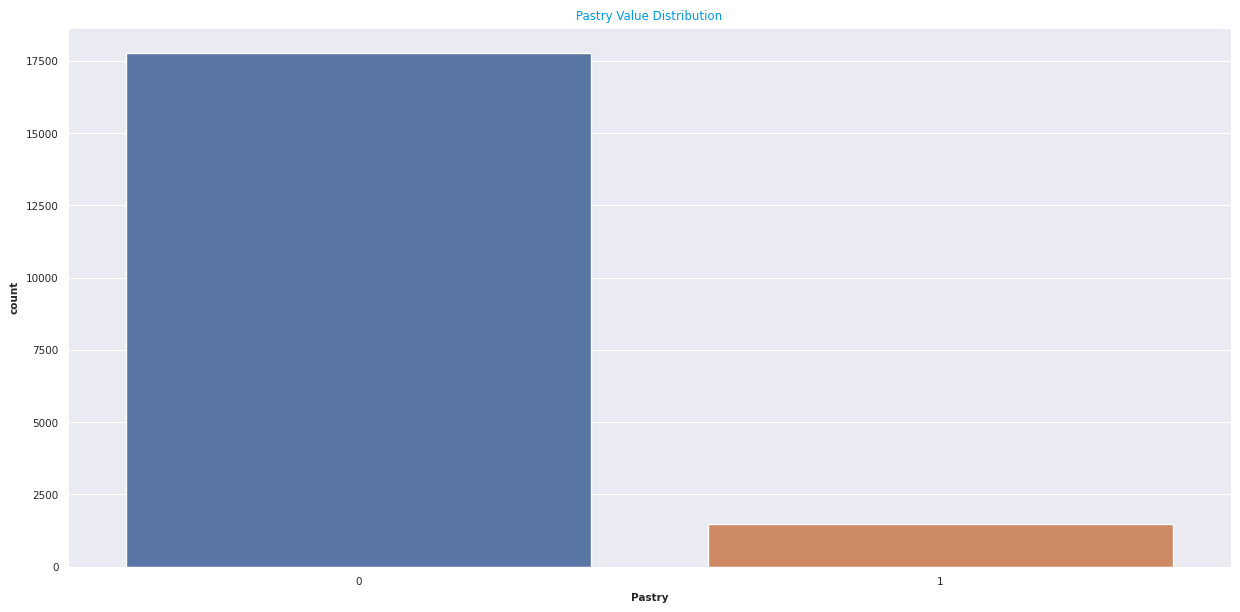

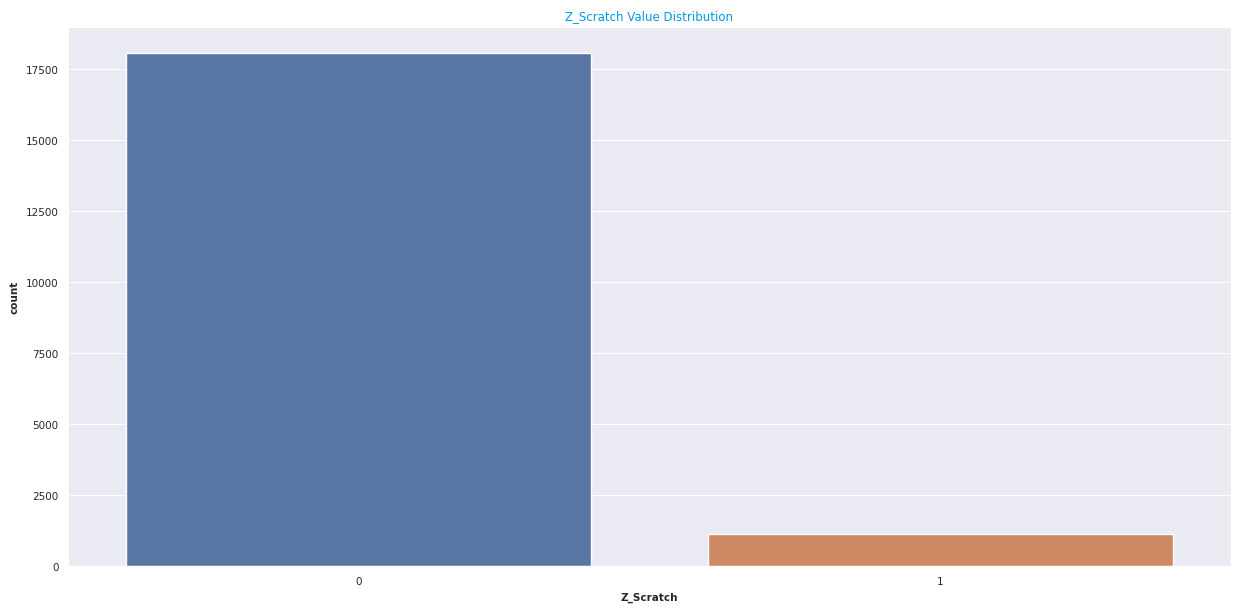

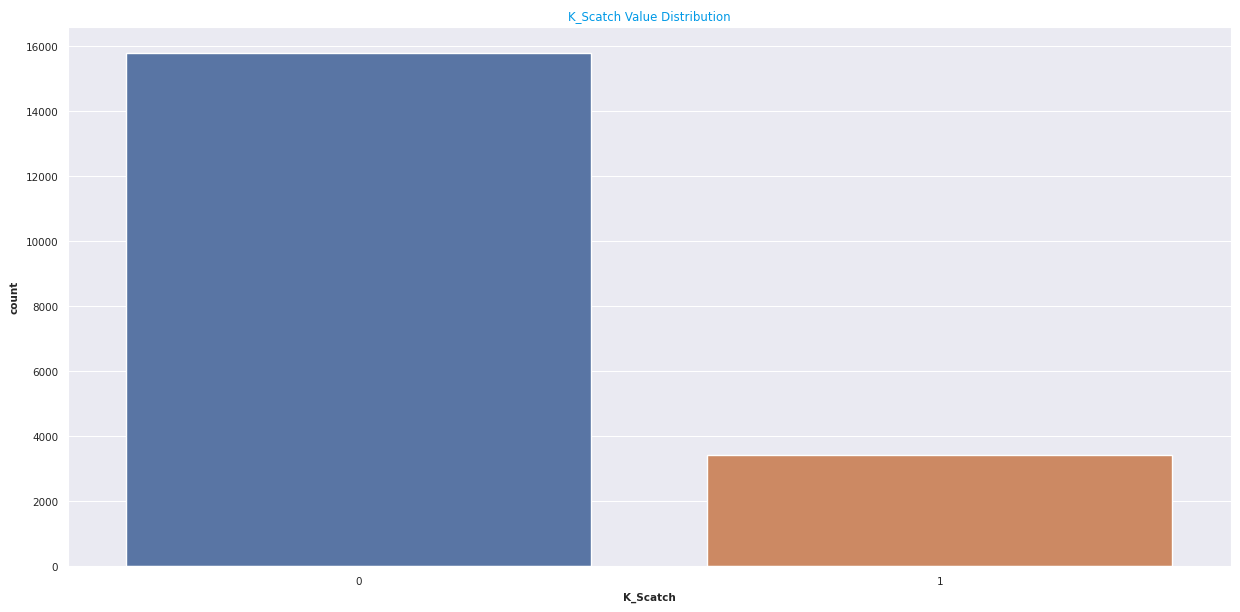

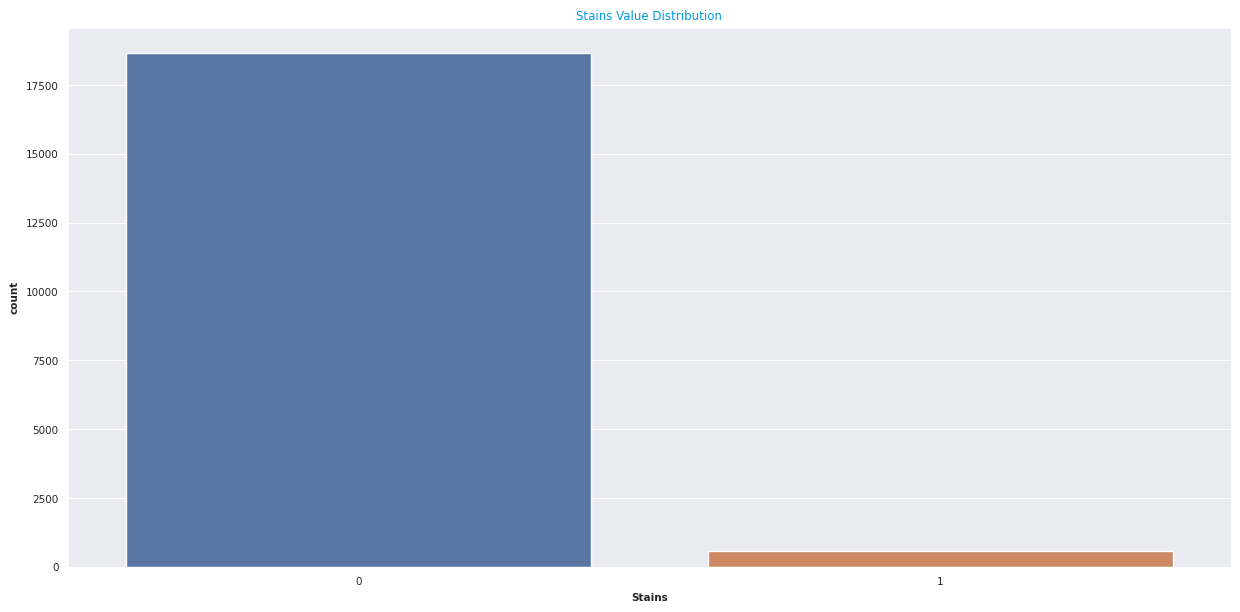

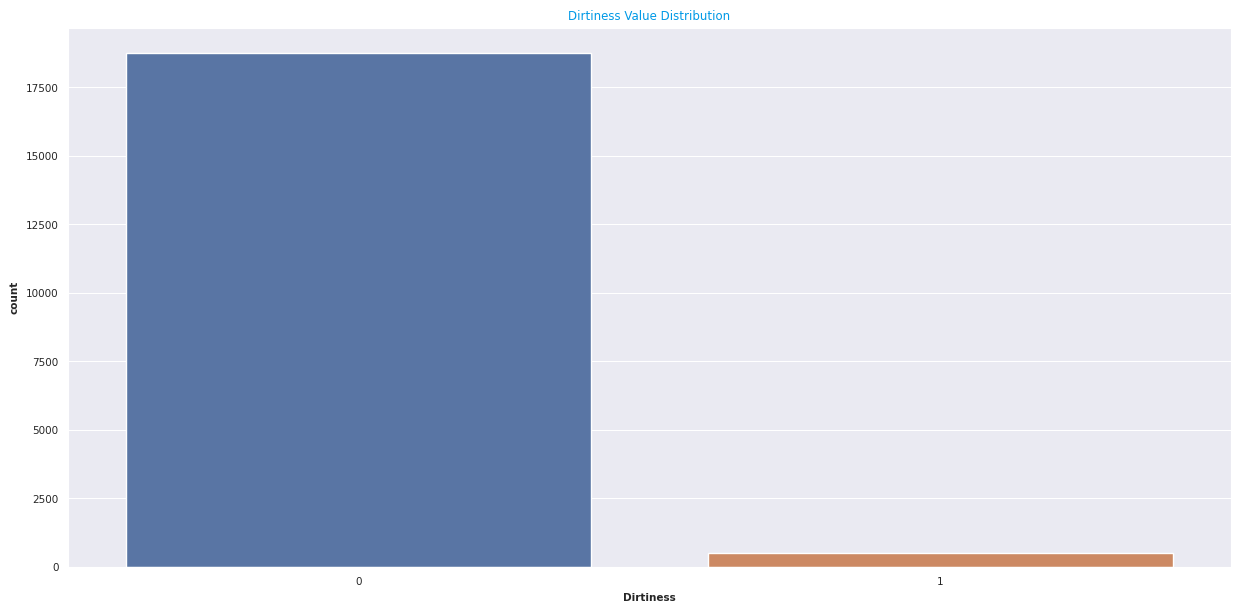

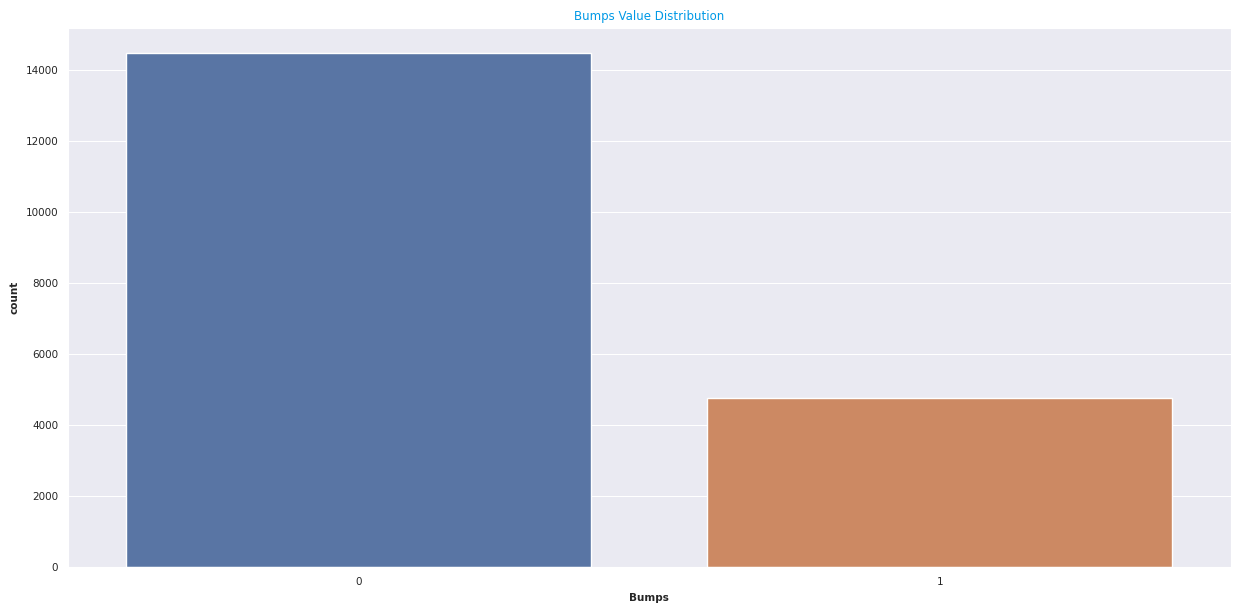

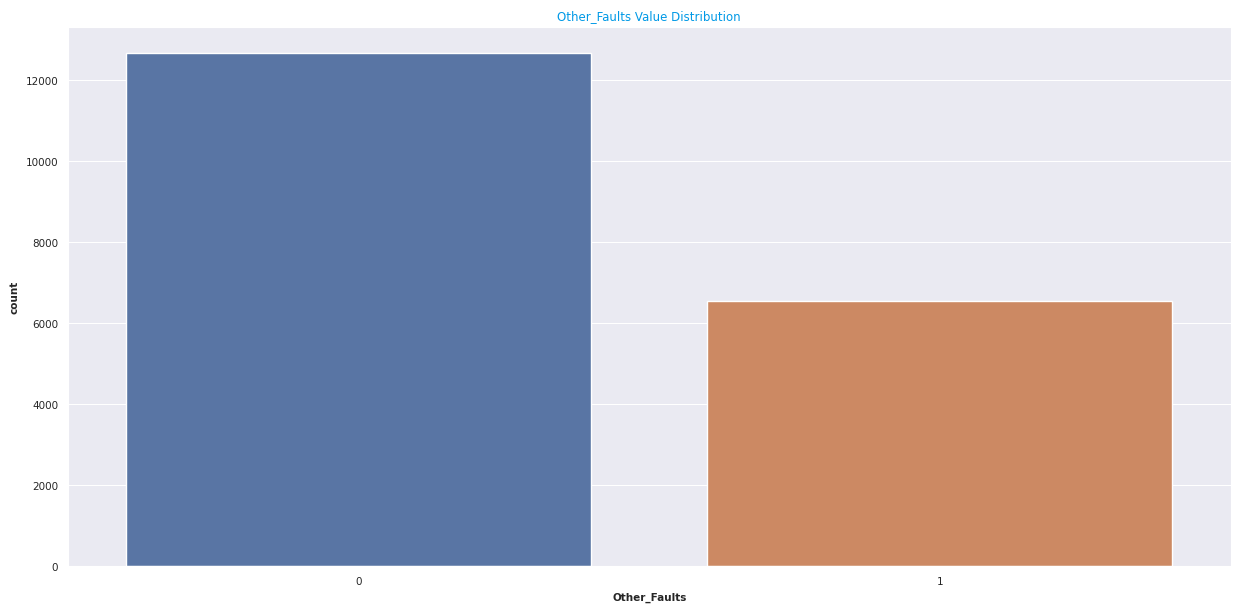

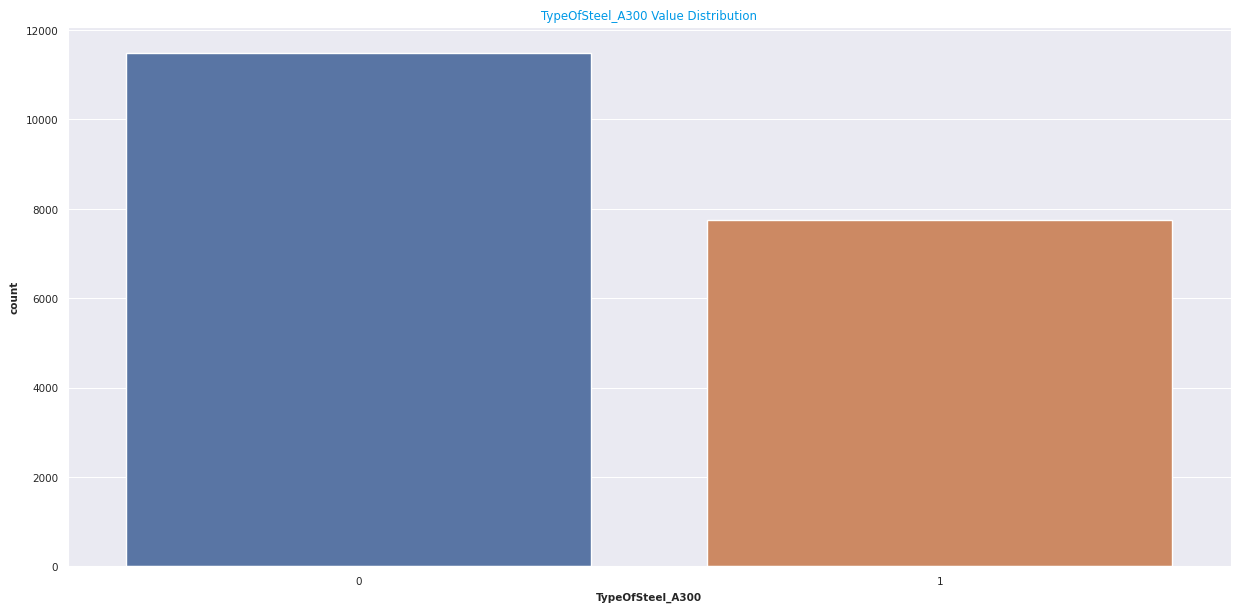

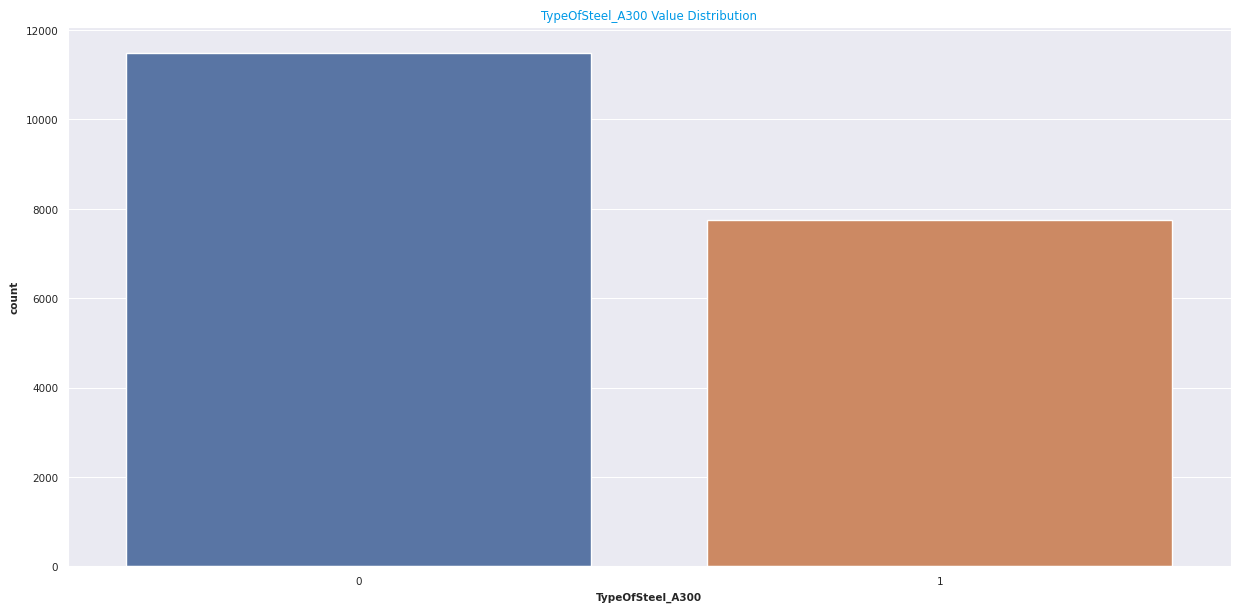

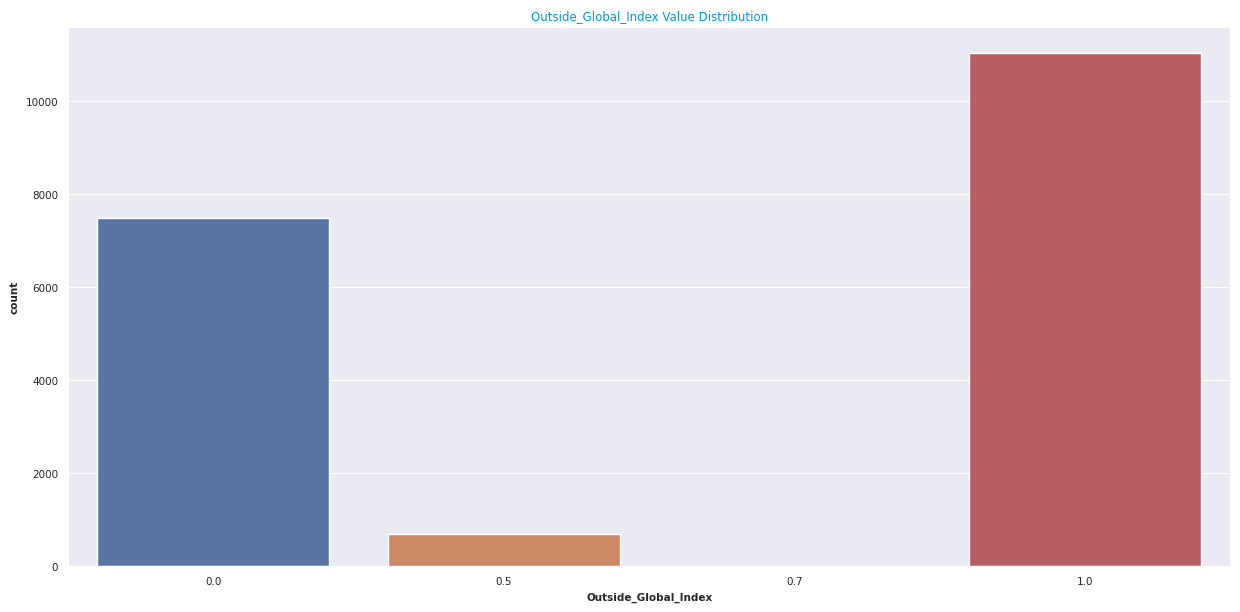

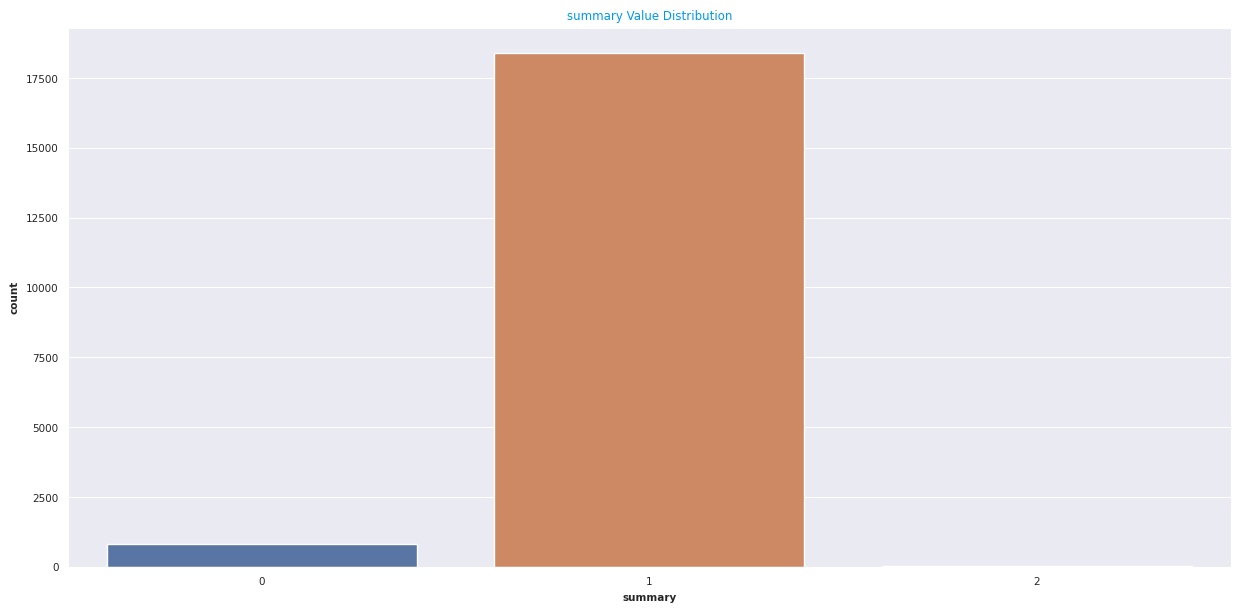

In [60]:
for col in cat_cols:
    plt.figure(figsize=[15,7])
    sns.countplot(df,x=train_df[col]).set(title= col+' Value Distribution')
    plt.show()

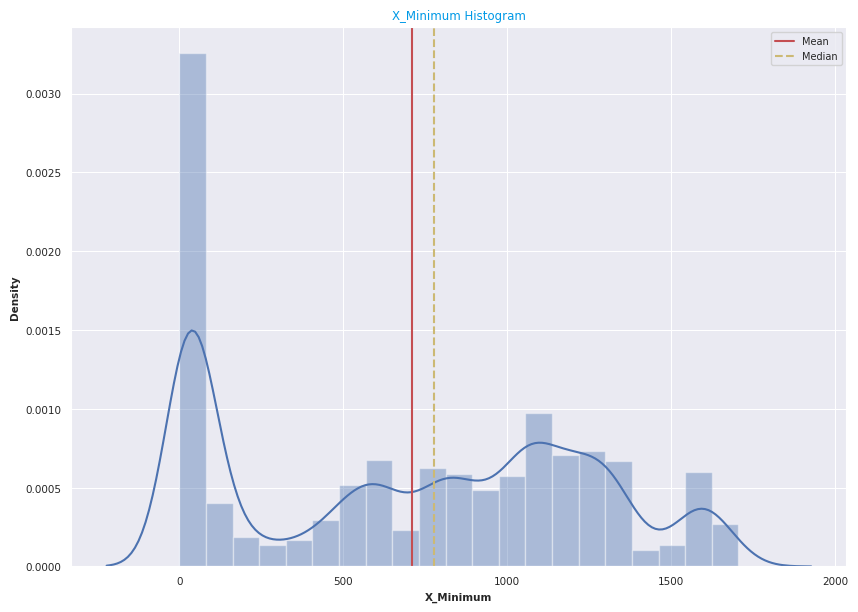

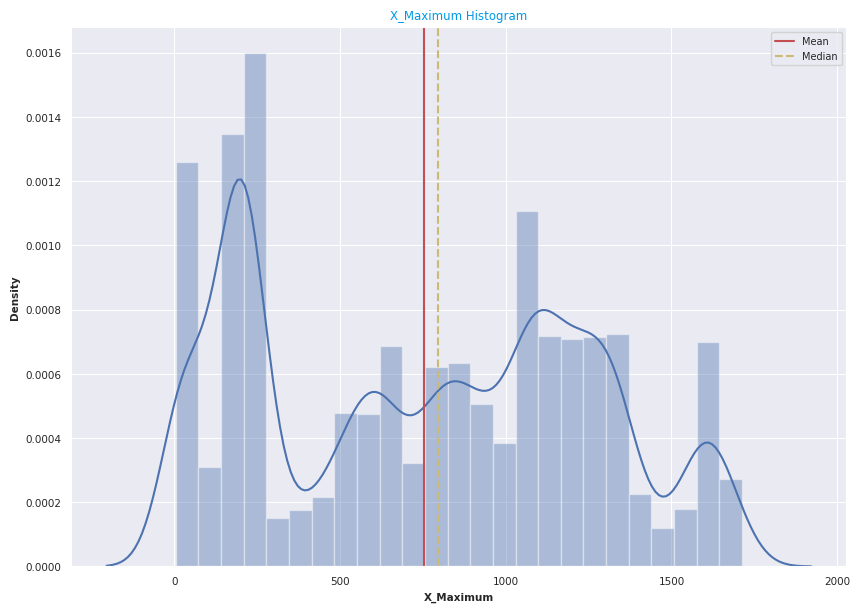

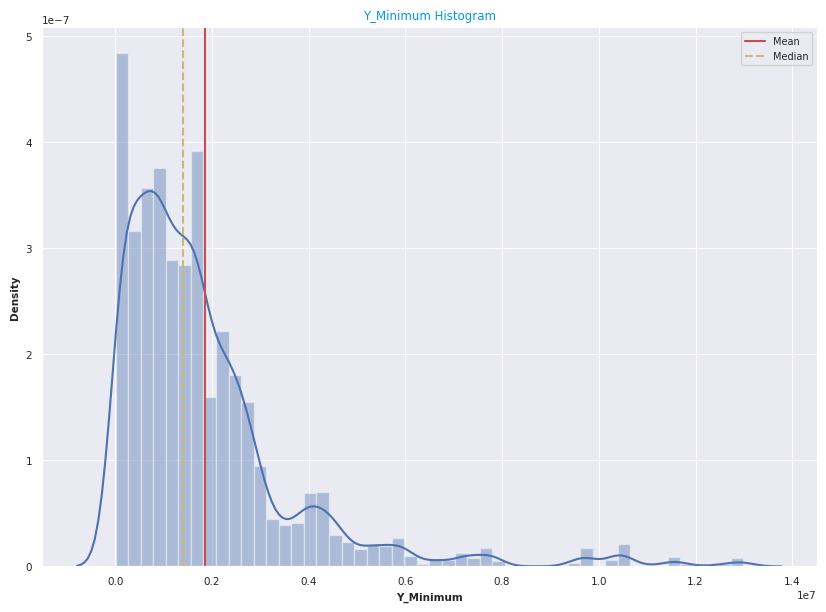

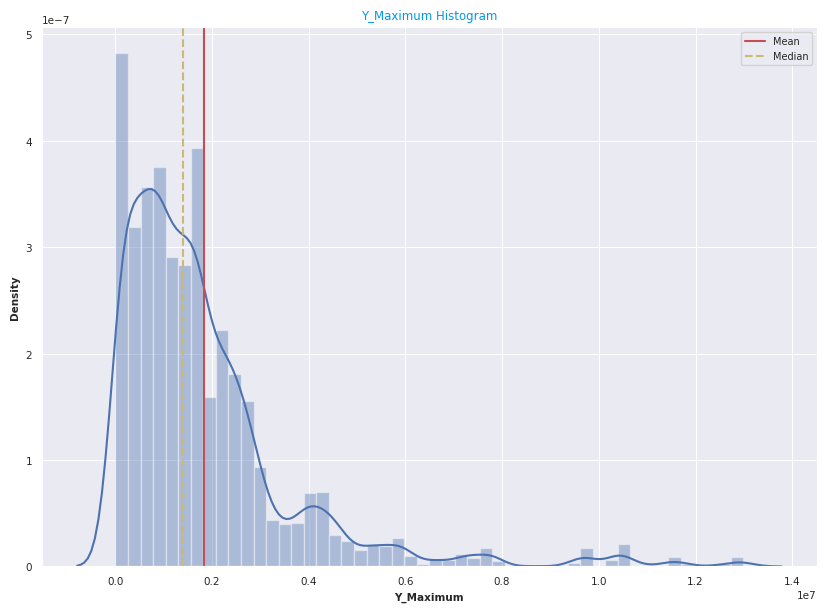

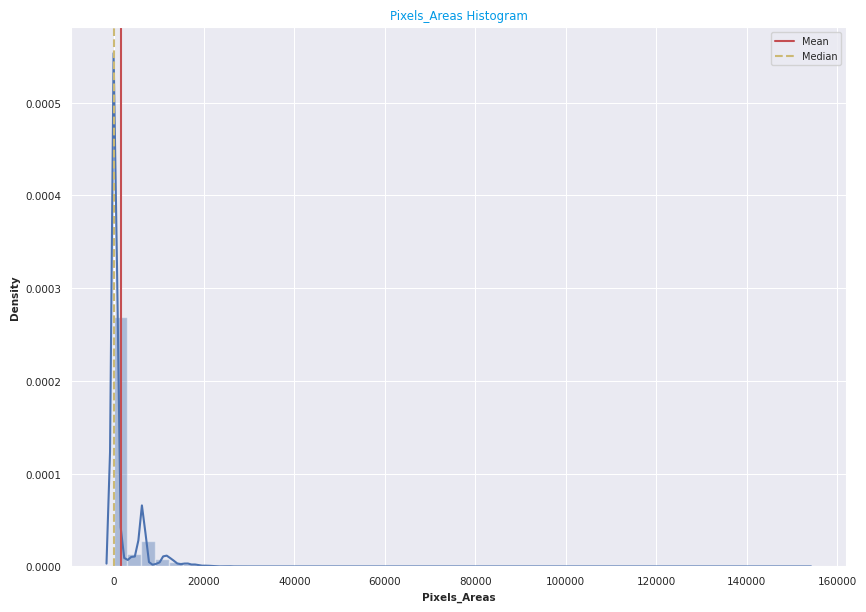

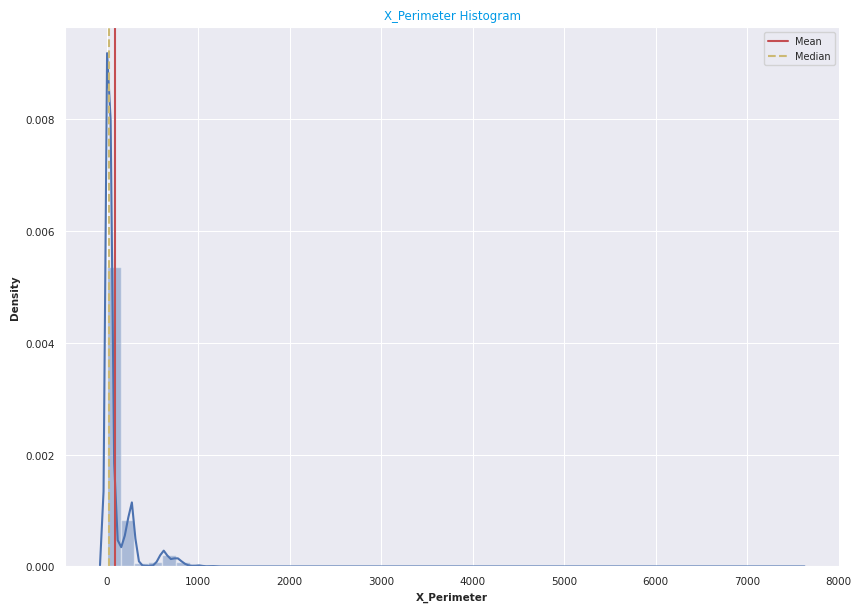

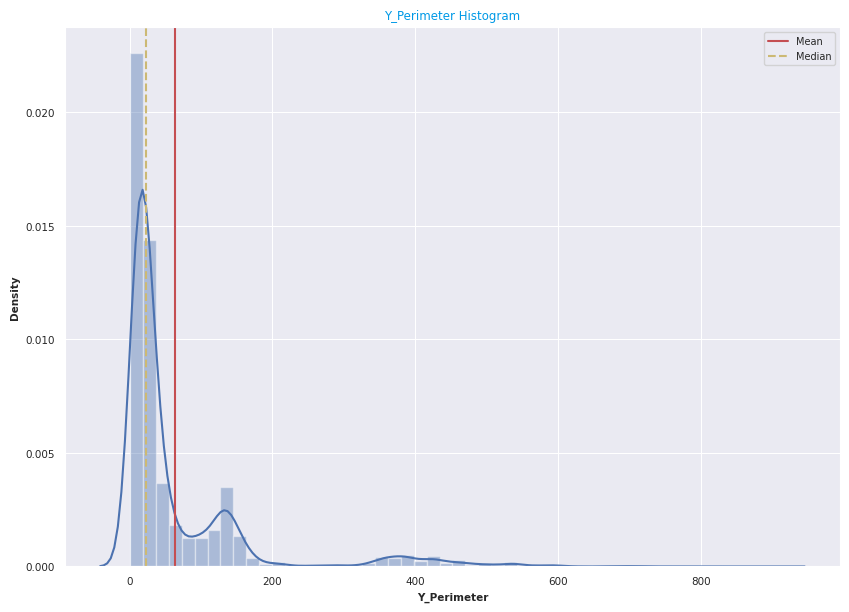

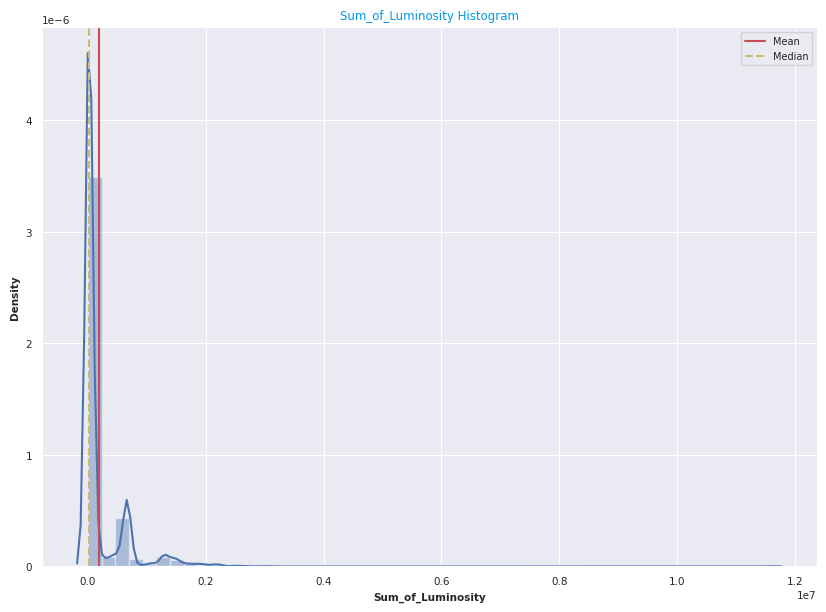

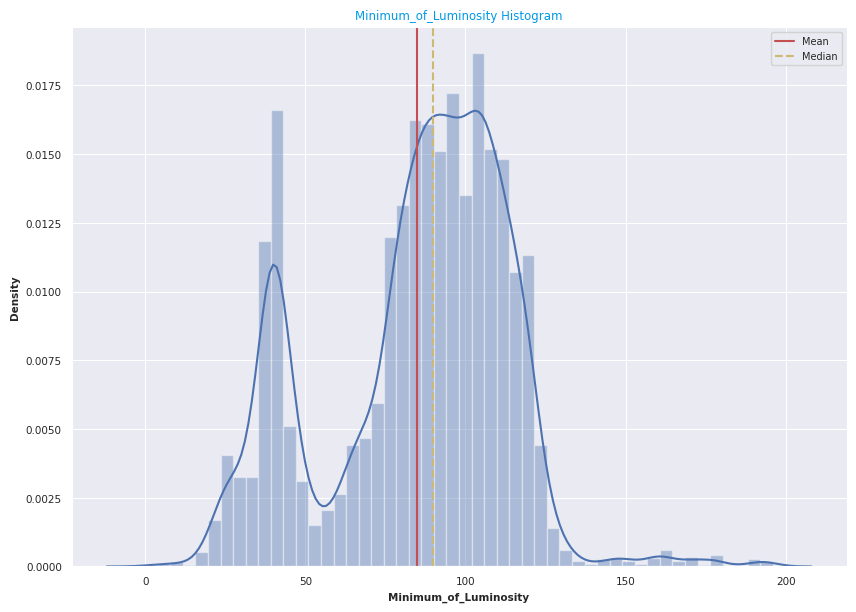

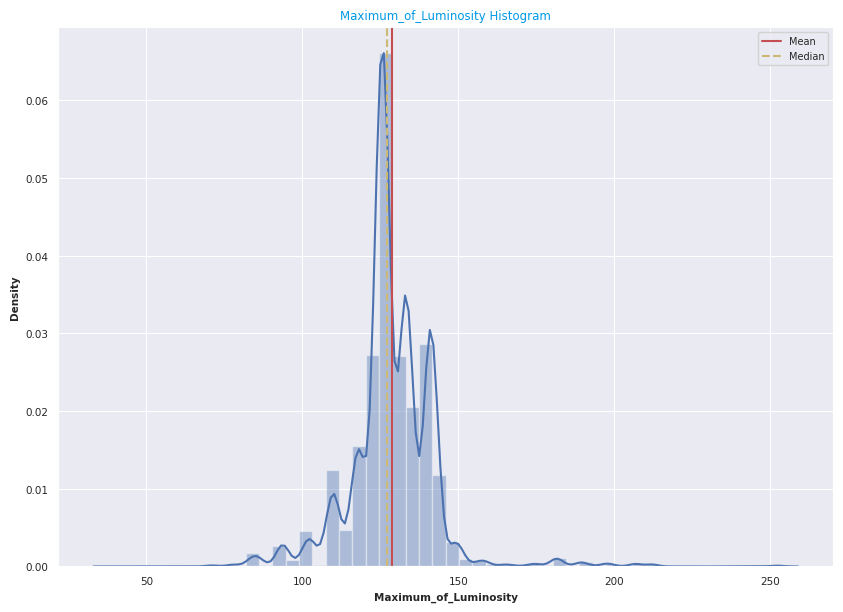

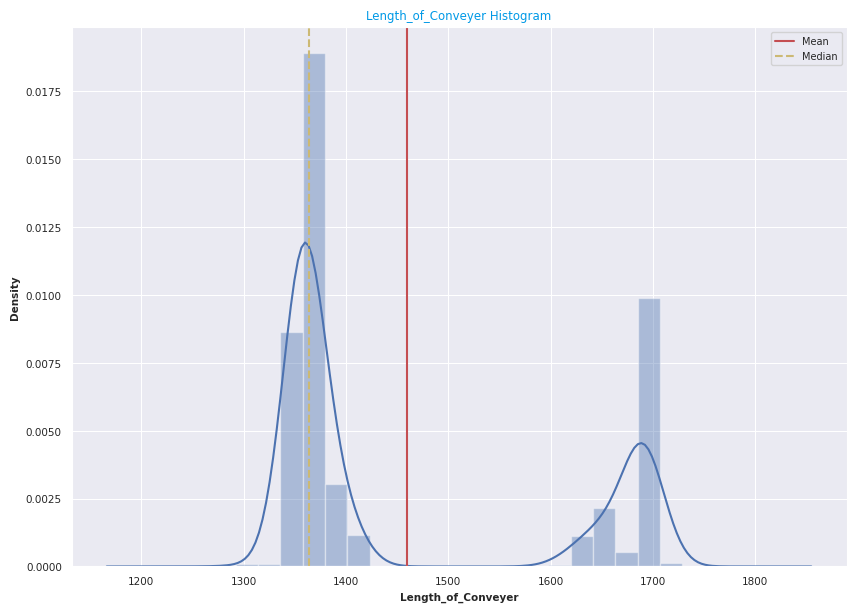

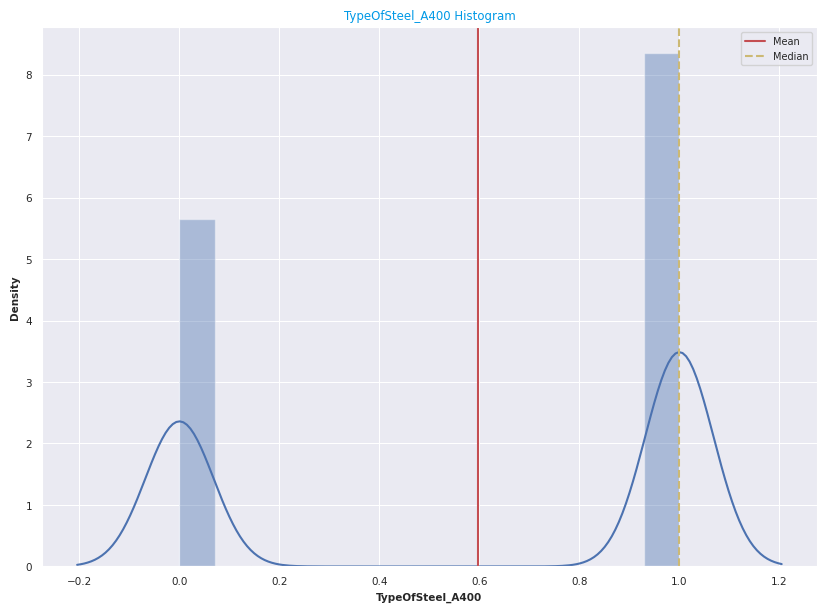

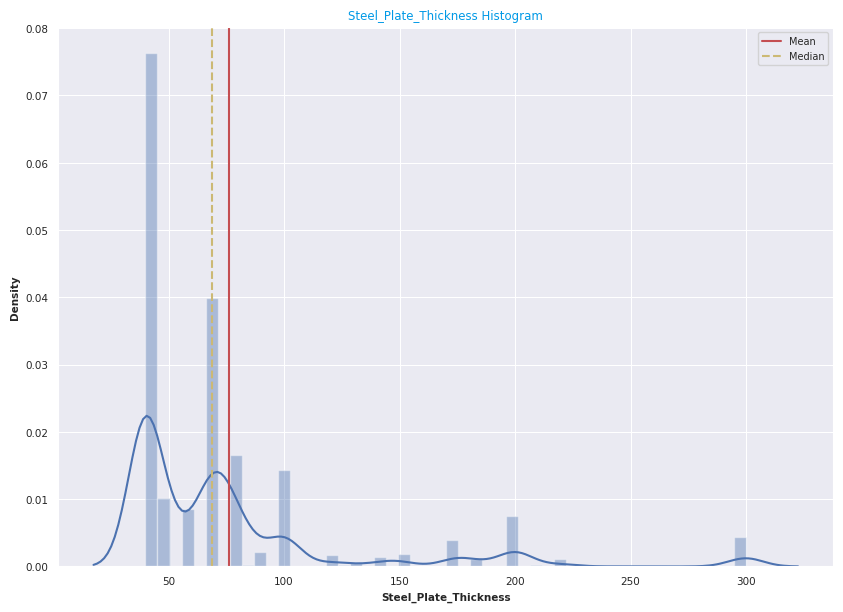

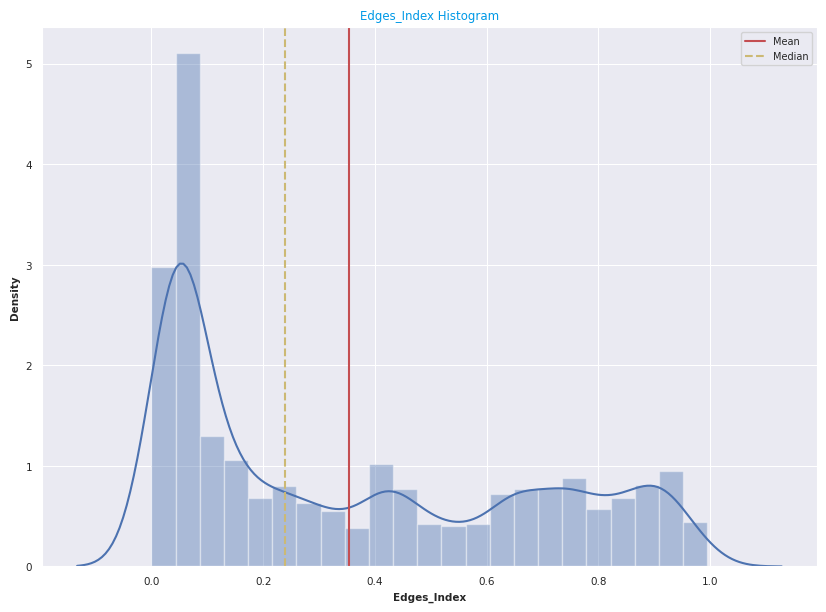

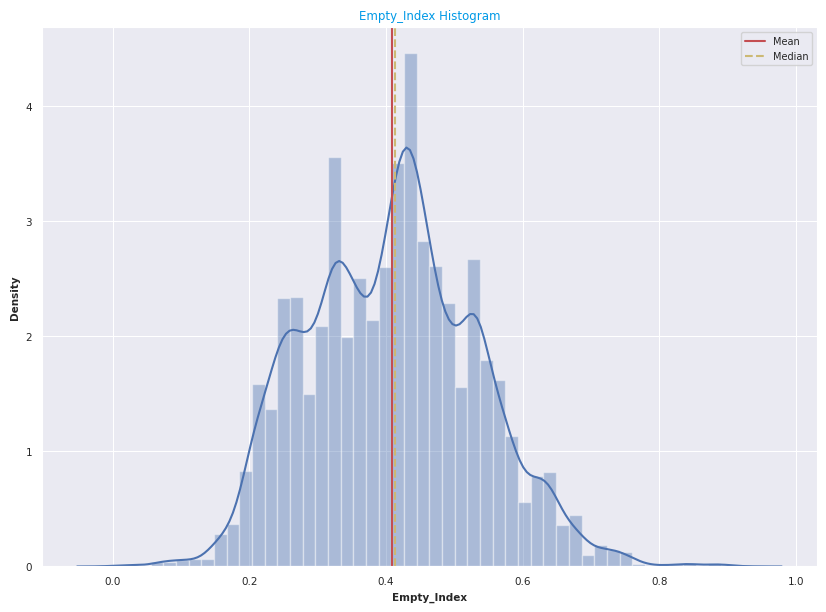

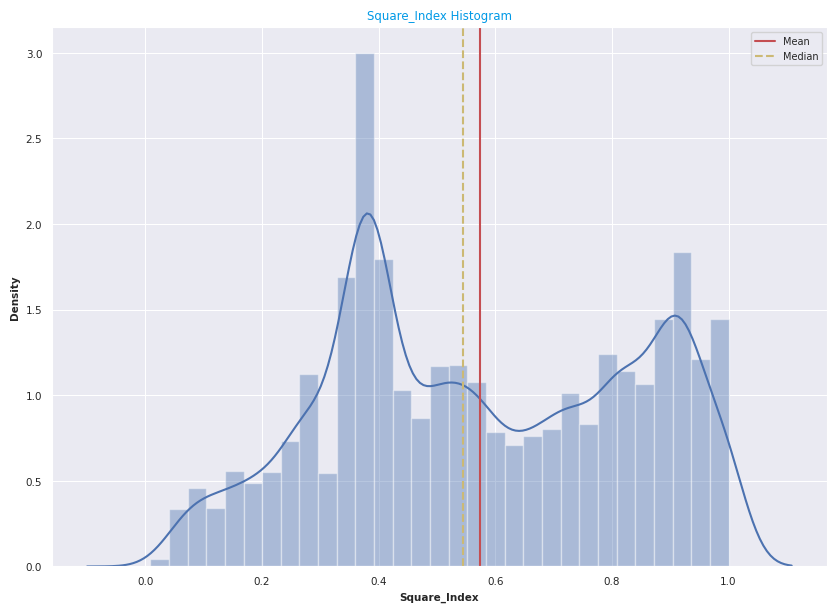

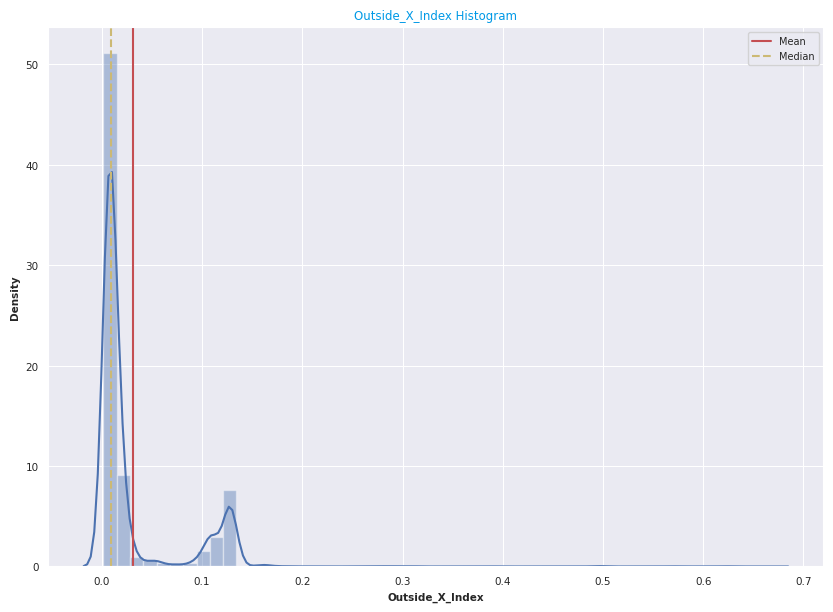

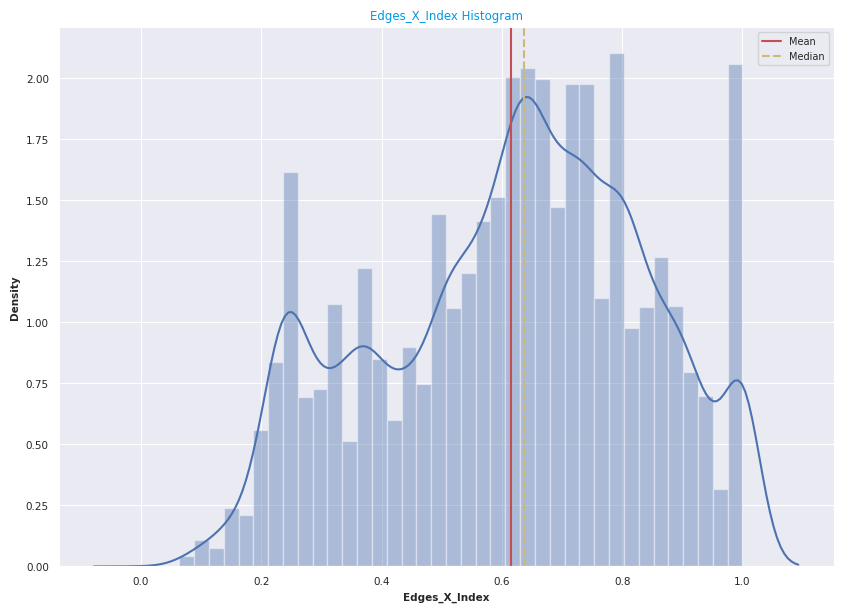

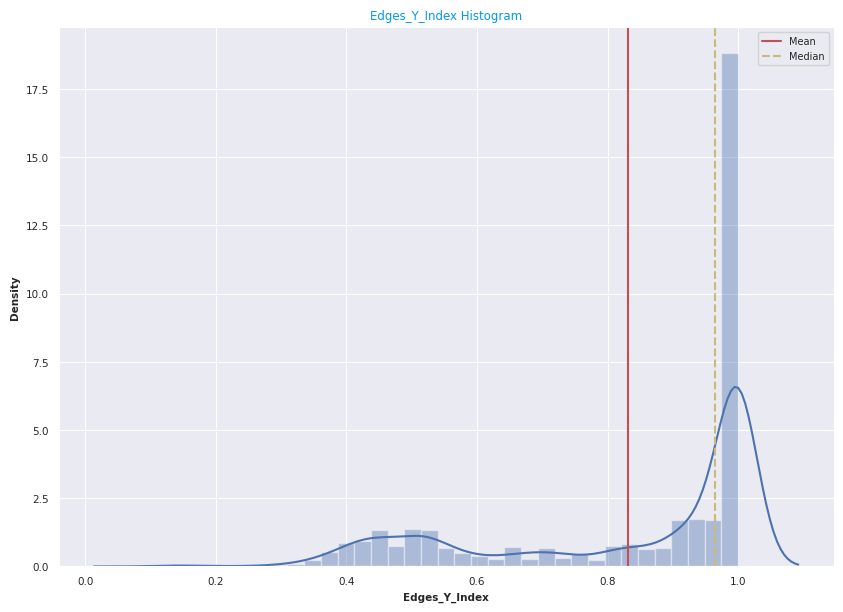

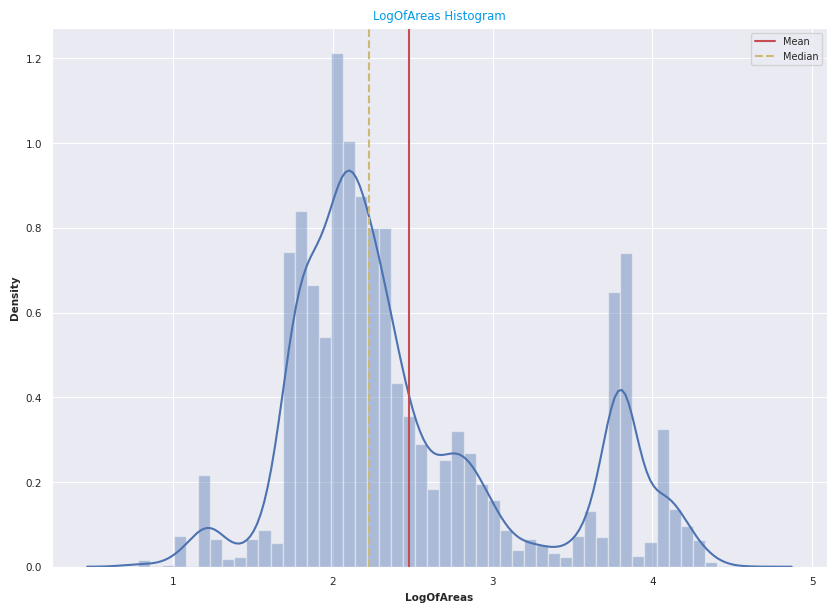

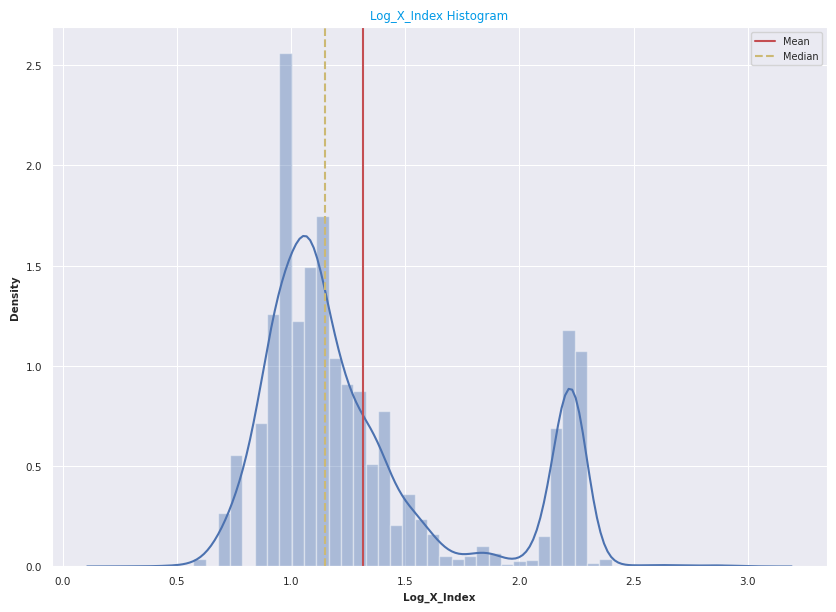

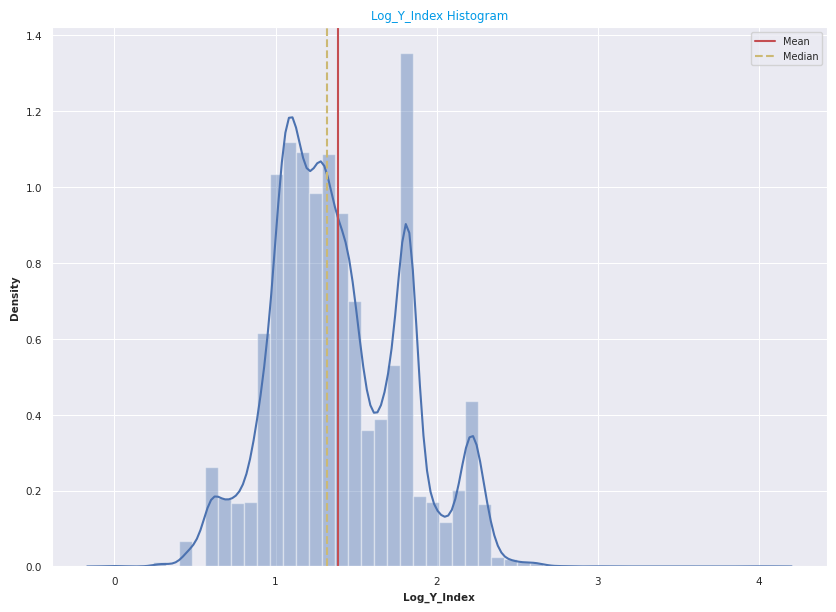

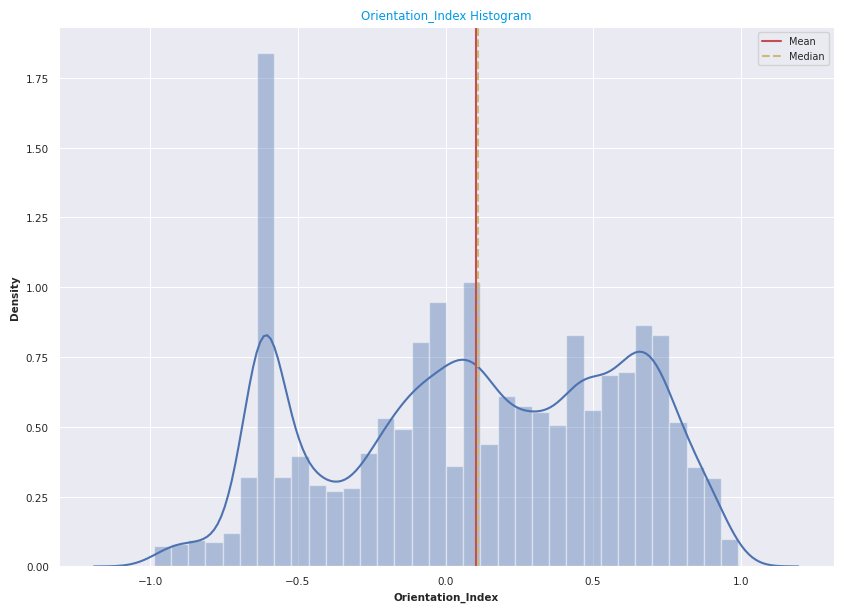

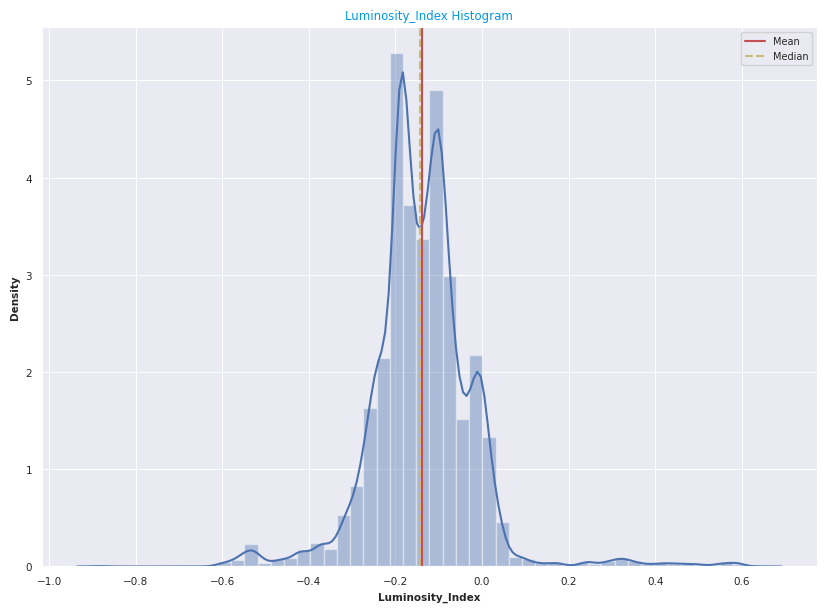

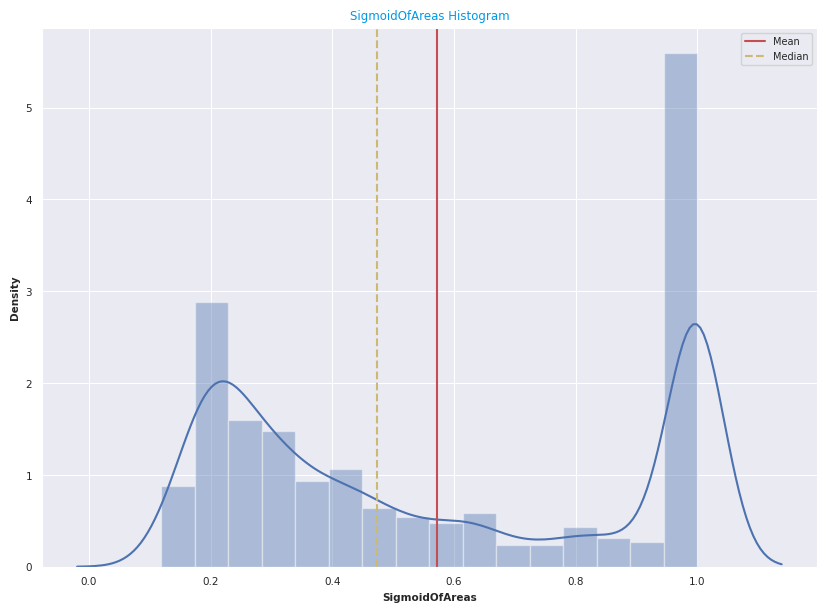

In [61]:
for col in num_cols:
    plt.figure(figsize=[10,7])
    sns.distplot(train_df[col],kde=True).set(title= col+' Histogram')
    plt.axvline(train_df[col].mean(),color='r', label='Mean')
    plt.axvline(train_df[col].median(),color='y', linestyle='--',label='Median')
    plt.legend()
    plt.show()

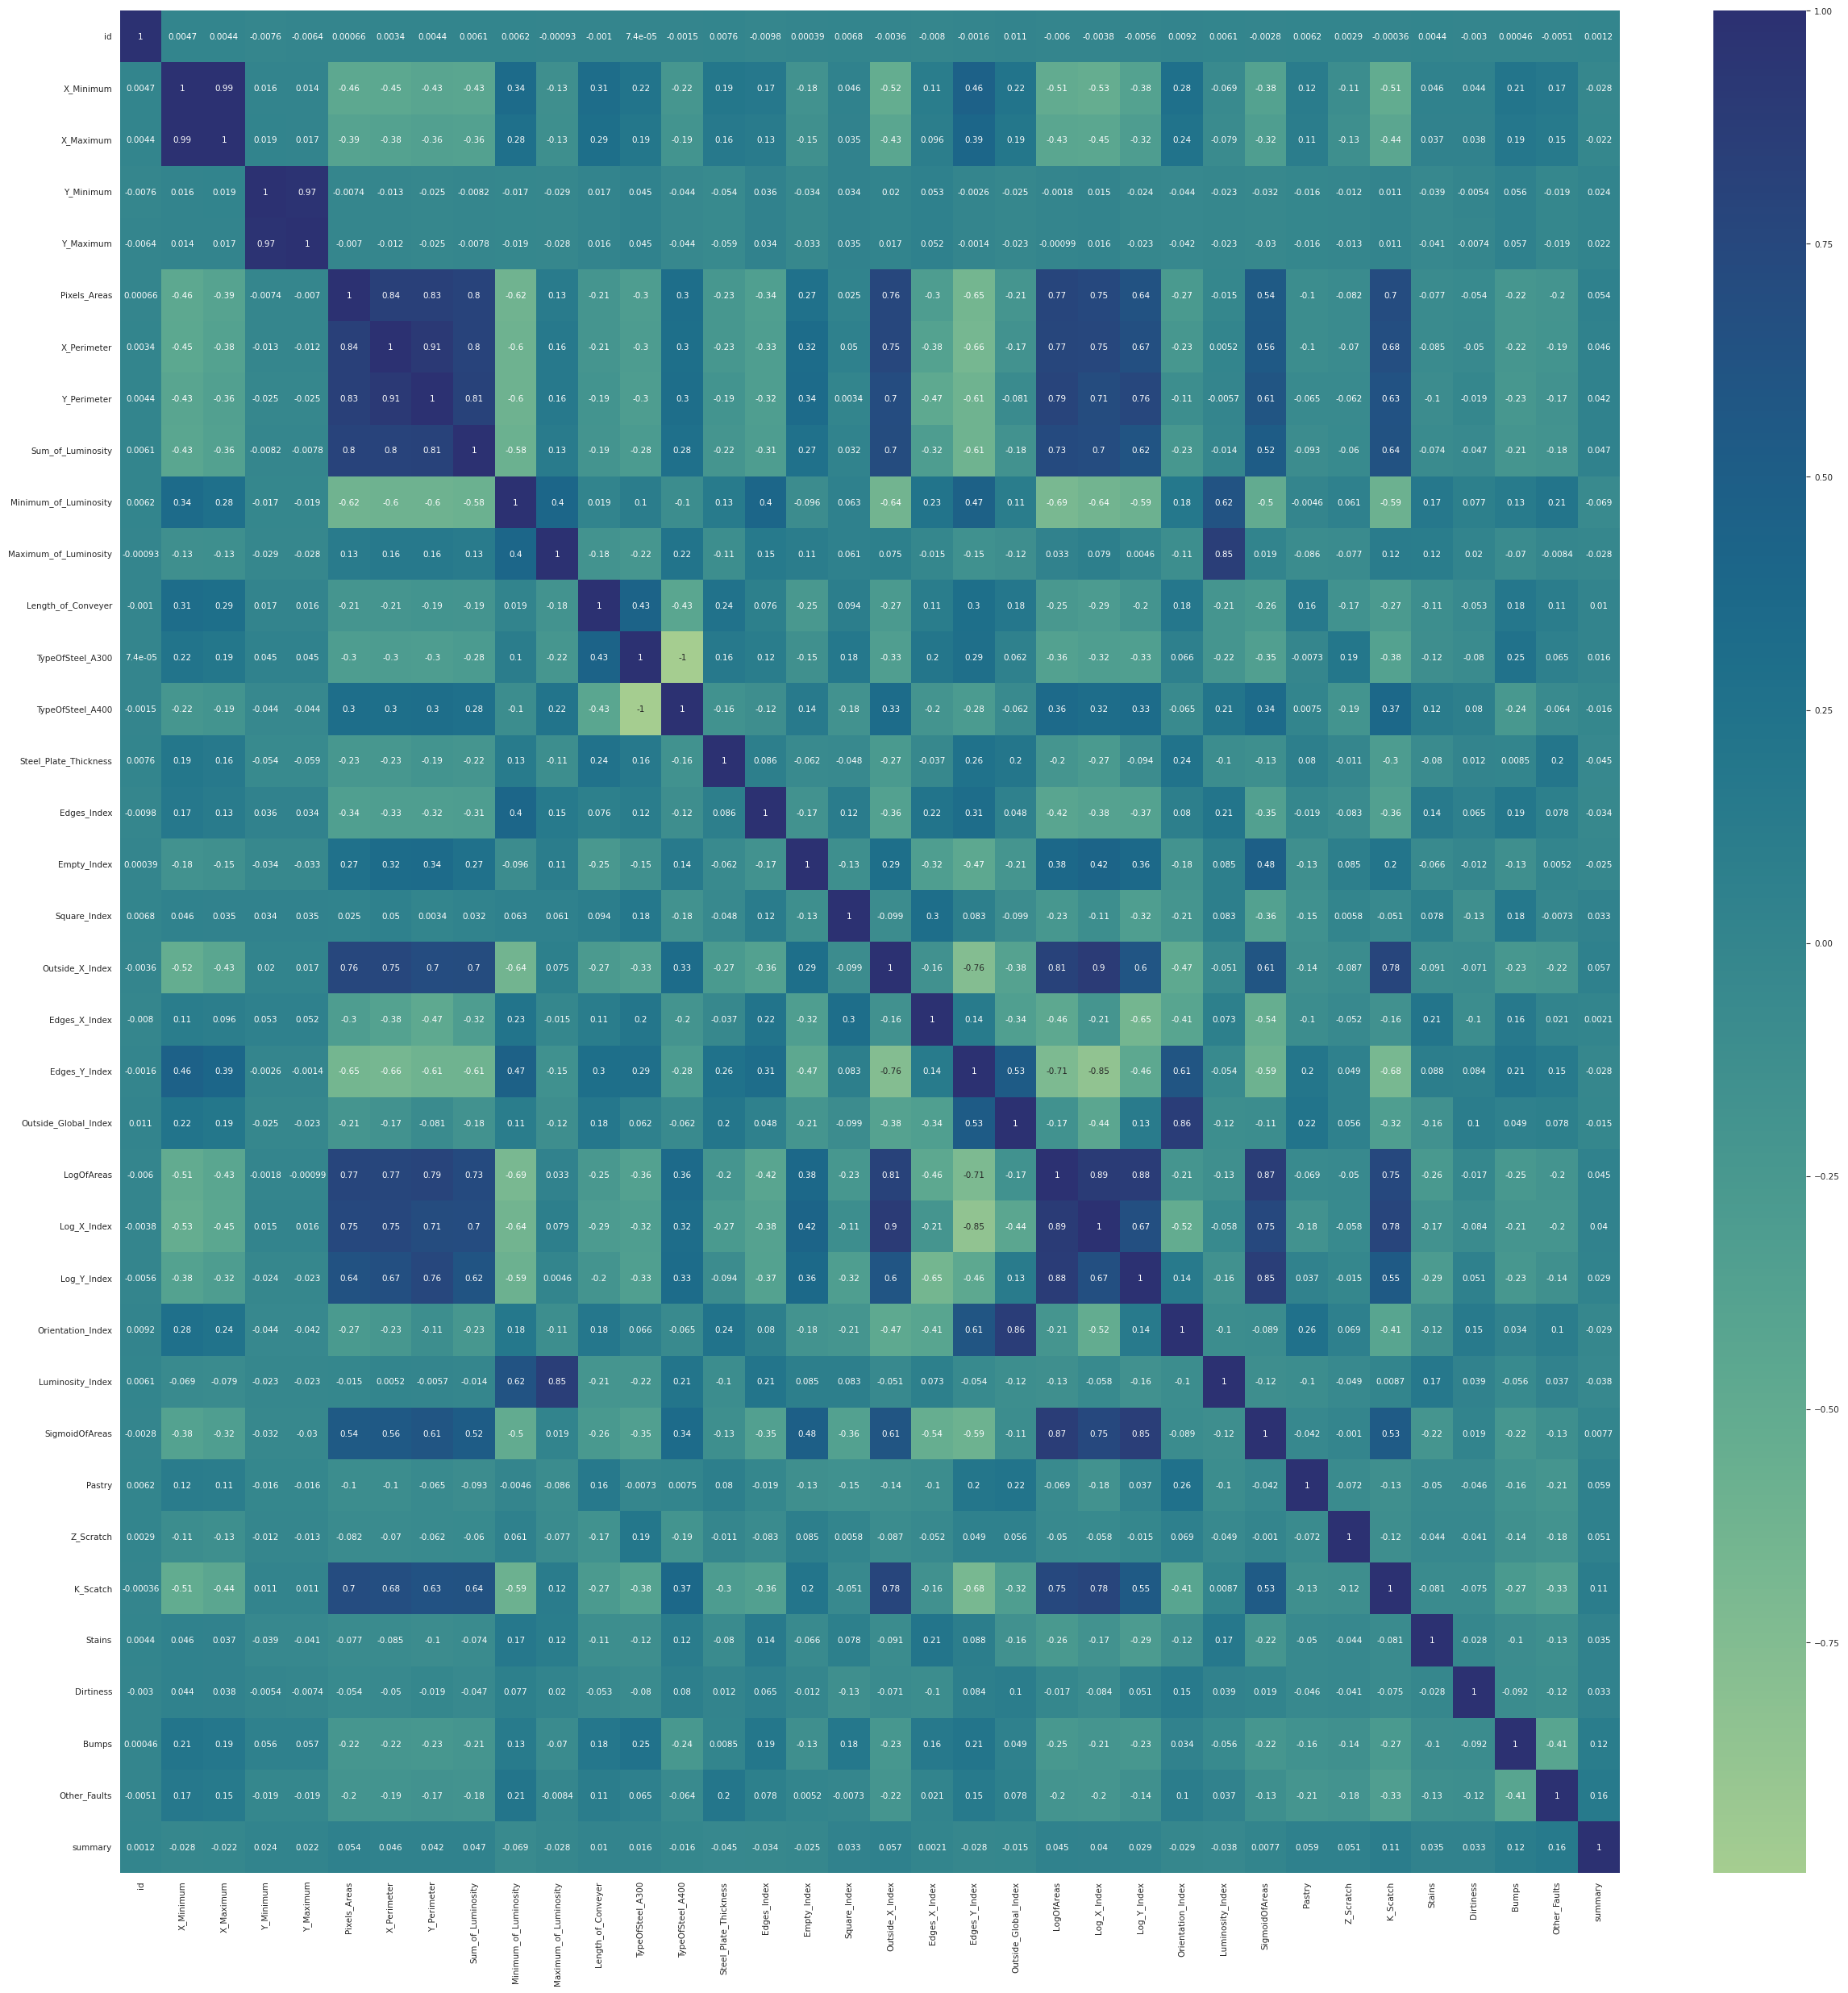

In [62]:
corr = train_df.corr()
# plot the heatmap
plt.figure(figsize=(30,30))
s=sns.heatmap(corr,annot=True, cmap='crest')

In [63]:
train_df=train_df[train_df['summary']<=1]
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X
X=train_df.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults','summary' ])
y=train_df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults' ]].idxmax(1)
y.unique()

array(['Stains', 'Other_Faults', 'K_Scatch', 'Bumps', 'Pastry',
       'Z_Scratch', 'Dirtiness'], dtype=object)

In [64]:
y = y.map({'Pastry':0, 'Z_Scratch':1,'K_Scatch':2,'Stains':3,'Dirtiness':4,'Bumps':5,'Other_Faults':6})
y.head()

0    3
1    6
2    2
3    2
4    6
dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.9, random_state=42)
X.keys()
test_df=scale(test)

In [66]:
def evaluate(y_test,ypred):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    print("Accuracy: ",accuracy_score(y_test,y_pred)) 
    print("Recall Score: ", recall_score(y_test,y_pred, average='macro')) #Recall measures the proportion of true positive predictions among all actual positive instalnces. If we predicted 100 survived correctly whereas actually 100 survived out of which 67 predicted correctly so recall will be 0.67
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    s=sns.heatmap(cm,annot=True, cmap='Reds')
def Plotlearn(eval,tit,metric):
    plt.plot(eval['validation_0'][metric], label='train')
    plt.plot(eval['validation_1'][metric], label='test')
    plt.legend()
    plt.title(tit)
    plt.show()

In [67]:
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
import lightgbm as lgb  
xgb.set_config(verbosity=0)
evalset = [(X_train, y_train), (X_test,y_test)]
xgb_model = xgb.XGBClassifier(objective='multi:softmax',tree_method="hist", gamma=0.16,max_depth=5,subsample= 0.7, colsample_bytree=0.51,min_child_weight=2,learning_rate=0.01, n_estimaters=850)
cat_model = CatBoostClassifier(eval_metric='MultiClass',depth=5,l2_leaf_reg=5.3, bagging_temperature=0.6,learning_rate=0.14,iterations=1000,logging_level='Silent')
lgbm_model = lgb.LGBMClassifier(metric='multi_logloss', boosting_type= "gbdt", learning_rate=0.005,n_estimators=800, max_depth=6, num_leaves=252, reg_alpha= 0.002,reg_lambda= 3.5,min_split_gain=0.05,subsample=0.6, verbose=-1)
xgb_model.fit(X_train, y_train, eval_metric='mlogloss', eval_set=evalset, verbose=False)
cat_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train, eval_set=evalset)

LGBMClassifier(learning_rate=0.005, max_depth=6, metric='multi_logloss',
               min_split_gain=0.05, n_estimators=800, num_leaves=252,
               reg_alpha=0.002, reg_lambda=3.5, subsample=0.6, verbose=-1)


XGBoost accuracy:  0.5588541666666667

CatBoost accuracy:  0.5635416666666667

LGBM accuracy:  0.5765625


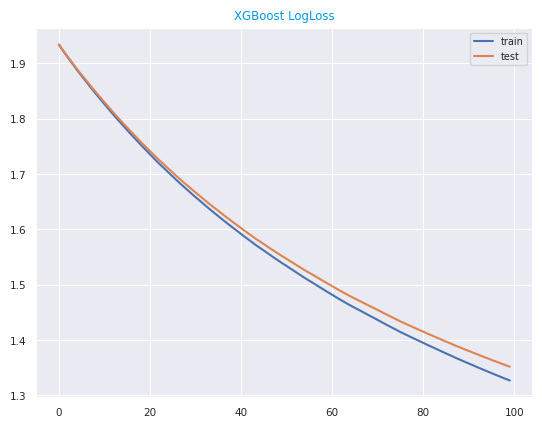

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

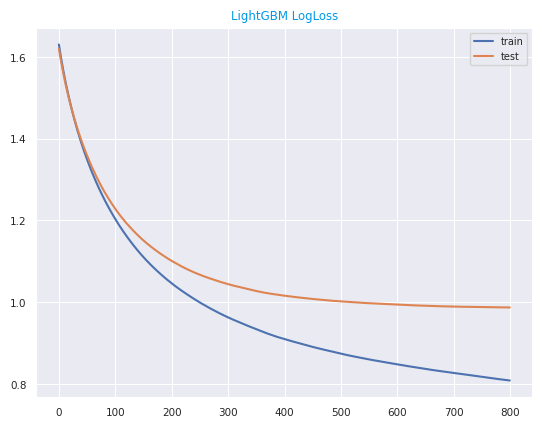

In [68]:
xbs=float(xgb_model.score(X_test,y_test))
cbs=float(cat_model.score(X_test,y_test))
lbs=float(lgbm_model.score(X_test,y_test))
ms=max(xbs,cbs,lbs)
print('\nXGBoost accuracy: ',xbs)
print('\nCatBoost accuracy: ',cbs)
print('\nLGBM accuracy: ',lbs)

Plotlearn(xgb_model.evals_result(),'XGBoost LogLoss','mlogloss')
metrics = cat_model.eval_metrics(Pool(X_test,y_test), 
                             metrics=['Accuracy'],
                             plot=True)
eval=lgbm_model.evals_result_
plt.plot(eval['training']['multi_logloss'], label='train')
plt.plot(eval['valid_1']['multi_logloss'], label='test')
plt.legend()
plt.title('LightGBM LogLoss')
plt.show()

In [69]:
result=pd.DataFrame(data=np.round((((xbs/(3*ms))*xgb_model.predict_proba(test_df))+((cbs/(3*ms))*cat_model.predict_proba(test_df))+((lbs/(3*ms))*lgbm_model.predict_proba(test_df))),1))

In [70]:
result

,0,1,2,3,4,5,6
0,0.4,0.0,0.0,0.0,0.0,0.1,0.3
1,0.2,0.0,0.0,0.0,0.2,0.1,0.4
2,0.2,0.1,0.1,0.0,0.0,0.2,0.4
3,0.2,0.0,0.0,0.0,0.0,0.3,0.4
4,0.1,0.0,0.0,0.0,0.0,0.4,0.3
...,...,...,...,...,...,...,...
12809,0.2,0.1,0.0,0.0,0.0,0.2,0.4
12810,0.1,0.0,0.0,0.0,0.2,0.1,0.4
12811,0.1,0.0,0.7,0.0,0.0,0.0,0.1
12812,0.2,0.0,0.0,0.0,0.1,0.1,0.4


In [74]:
result=result.rename(columns={0:"Pastry",1:"Z_Scratch",2:"K_Scatch",3:"Stains",4:"Dirtiness",5:"Bumps",6:"Other_Faults"})


In [75]:
submission = pd.DataFrame(result)

In [76]:
submission.insert(0, 'id', test['id']) 

In [77]:
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.4,0.0,0.0,0.0,0.0,0.1,0.3
1,19220,0.2,0.0,0.0,0.0,0.2,0.1,0.4
2,19221,0.2,0.1,0.1,0.0,0.0,0.2,0.4
3,19222,0.2,0.0,0.0,0.0,0.0,0.3,0.4
4,19223,0.1,0.0,0.0,0.0,0.0,0.4,0.3
...,...,...,...,...,...,...,...,...
12809,32028,0.2,0.1,0.0,0.0,0.0,0.2,0.4
12810,32029,0.1,0.0,0.0,0.0,0.2,0.1,0.4
12811,32030,0.1,0.0,0.7,0.0,0.0,0.0,0.1
12812,32031,0.2,0.0,0.0,0.0,0.1,0.1,0.4


In [78]:
submission.to_csv('submission.csv', index=False)

In [79]:
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.4,0.0,0.0,0.0,0.0,0.1,0.3
1,19220,0.2,0.0,0.0,0.0,0.2,0.1,0.4
2,19221,0.2,0.1,0.1,0.0,0.0,0.2,0.4
3,19222,0.2,0.0,0.0,0.0,0.0,0.3,0.4
4,19223,0.1,0.0,0.0,0.0,0.0,0.4,0.3
...,...,...,...,...,...,...,...,...
12809,32028,0.2,0.1,0.0,0.0,0.0,0.2,0.4
12810,32029,0.1,0.0,0.0,0.0,0.2,0.1,0.4
12811,32030,0.1,0.0,0.7,0.0,0.0,0.0,0.1
12812,32031,0.2,0.0,0.0,0.0,0.1,0.1,0.4
